In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

In [26]:
df = pd.read_csv("complaints_25Nov21.csv")
df

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2016-10-26,Money transfers,International money transfer,Other transaction issues,NaN,"To whom it concerns, I would like to file a fo...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",NaN,NaN,NaN,Consent provided,Web,2016-10-29,Closed with explanation,Yes,No,2180490
1,2015-03-27,Bank account or service,Other bank product/service,"Account opening, closing, or management",NaN,My name is XXXX XXXX XXXX and huband name is X...,Company chooses not to provide a public response,"CITIBANK, N.A.",PA,151XX,Older American,Consent provided,Web,2015-03-27,Closed with explanation,Yes,No,1305453
2,2015-04-20,Bank account or service,Other bank product/service,"Making/receiving payments, sending money",NaN,XXXX 2015 : I called to make a payment on XXXX...,Company chooses not to provide a public response,U.S. BANCORP,PA,152XX,NaN,Consent provided,Web,2015-04-22,Closed with monetary relief,Yes,No,1337613
3,2013-04-29,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",NaN,NaN,NaN,JPMORGAN CHASE & CO.,VA,22406,Servicemember,NaN,Phone,2013-04-30,Closed with explanation,Yes,Yes,393900
4,2013-05-29,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",GA,30044,NaN,NaN,Referral,2013-05-31,Closed with explanation,Yes,No,418647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207255,2015-05-24,Debt collection,Credit card,Taking/threatening an illegal action,Sued w/o proper notification of suit,NaN,NaN,JPMORGAN CHASE & CO.,FL,33133,NaN,Consent not provided,Web,2015-05-24,Closed with explanation,Yes,No,1390395
207256,2012-01-10,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,JPMORGAN CHASE & CO.,NY,10312,NaN,NaN,Referral,2012-01-11,Closed without relief,Yes,Yes,12192
207257,2012-07-17,Student loan,Non-federal student loan,Repaying your loan,NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",NH,032XX,NaN,NaN,Web,2012-07-18,Closed with explanation,Yes,No,118351
207258,2016-09-29,Bank account or service,Checking account,"Account opening, closing, or management",NaN,Near the end of XXXX 2016 I opened a Citigold ...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",CA,900XX,NaN,Consent provided,Web,2016-09-29,Closed with non-monetary relief,Yes,No,2138969


In [28]:
# Summary statistics for numerical columns
print(df.describe())

# Distribution of data
print(df['Product'].value_counts())  # Count of complaints per product
print(df['State'].value_counts())    # Count of complaints per state

       Complaint ID
count  2.072600e+05
mean   1.028619e+06
std    7.533348e+05
min    2.200000e+01
25%    3.456218e+05
50%    9.209720e+05
75%    1.710704e+06
max    2.412707e+06
Product
Mortgage                   101680
Bank account or service     44594
Credit card                 42191
Debt collection              7861
Consumer Loan                5508
Student loan                 2866
Money transfers               869
Credit reporting              741
Prepaid card                  635
Other financial service       232
Payday loan                    83
Name: count, dtype: int64
State
CA    37505
FL    20134
NY    15616
TX    12123
NJ     9242
      ...  
MH       11
AS        6
AA        4
MP        4
PW        3
Name: count, Length: 62, dtype: int64


In [58]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [56]:
# Display the first few rows of the dataset
print(df.head())

# Check column names, data types, and missing values
print(df.info())

  Date received                  Product                   Sub-product  \
0    2016-10-26          Money transfers  International money transfer   
1    2015-03-27  Bank account or service    Other bank product/service   
2    2015-04-20  Bank account or service    Other bank product/service   
3    2013-04-29                 Mortgage   Conventional fixed mortgage   
4    2013-05-29                 Mortgage                Other mortgage   

                                      Issue Sub-issue  \
0                  Other transaction issues       NaN   
1   Account opening, closing, or management       NaN   
2  Making/receiving payments, sending money       NaN   
3  Application, originator, mortgage broker       NaN   
4  Loan modification,collection,foreclosure       NaN   

                        Consumer complaint narrative  \
0  To whom it concerns, I would like to file a fo...   
1  My name is XXXX XXXX XXXX and huband name is X...   
2  XXXX 2015 : I called to make a payment on

In [60]:
df['Consumer disputed?'].value_counts().sum()

207260

In [29]:
# Check distribution of the target variable ('Consumer disputed?')
print(df['Consumer disputed?'].value_counts())

Consumer disputed?
No     162357
Yes     44903
Name: count, dtype: int64


In [30]:
# Explore categorical variables
print(df['Issue'].value_counts())  # Check distribution of issues
print(df['Company'].value_counts())  # Distribution of complaints per company


Issue
Loan modification,collection,foreclosure    58940
Loan servicing, payments, escrow account    26608
Account opening, closing, or management     19762
Deposits and withdrawals                    12275
Application, originator, mortgage broker     7609
                                            ...  
Unable to get credit report/credit score        7
Disclosures                                     6
Can't stop charges to bank account              3
Lender damaged or destroyed property            1
Lender repossessed or sold the vehicle          1
Name: count, Length: 93, dtype: int64
Company
BANK OF AMERICA, NATIONAL ASSOCIATION    65440
WELLS FARGO & COMPANY                    53111
JPMORGAN CHASE & CO.                     42170
CITIBANK, N.A.                           34341
U.S. BANCORP                             12198
Name: count, dtype: int64


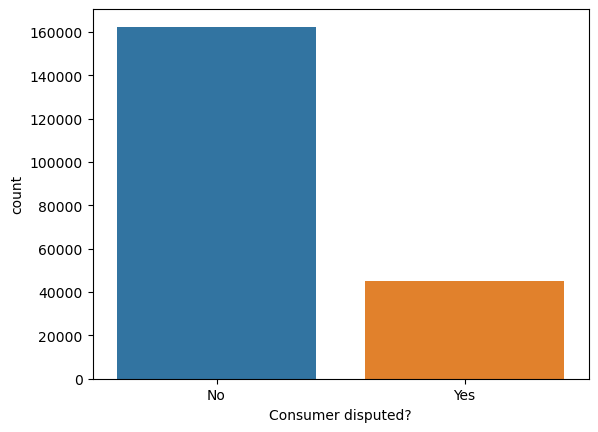

In [31]:

sns.countplot(x='Consumer disputed?', data=df)
plt.show()


In [32]:

# Select features and target variable
features = ['Product', 'Sub-product', 'Issue', 'State', 'Tags', 'Submitted via', 'Company response to consumer', 'Timely response?']
X = df[features]
y = df['Consumer disputed?']

# Initialize LabelEncoder and convert the target variable to 0s and 1s
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into a training set (80%) and a test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Check the proportion of disputed complaints in the training dataset
proportion_disputed = sum(y_train) / len(y_train)
if proportion_disputed < 0.30:
    # Perform random undersampling
    undersampler = RandomUnderSampler(random_state=123)
    X_train, y_train = undersampler.fit_resample(X_train, y_train)
    print("Performed random undersampling.")
else:
    print("No need for random undersampling, the data is already balanced.")


Performed random undersampling.


              precision    recall  f1-score   support

           0       0.84      0.53      0.65     32504
           1       0.27      0.63      0.38      8948

    accuracy                           0.55     41452
   macro avg       0.55      0.58      0.51     41452
weighted avg       0.71      0.55      0.59     41452

[[17157 15347]
 [ 3323  5625]]


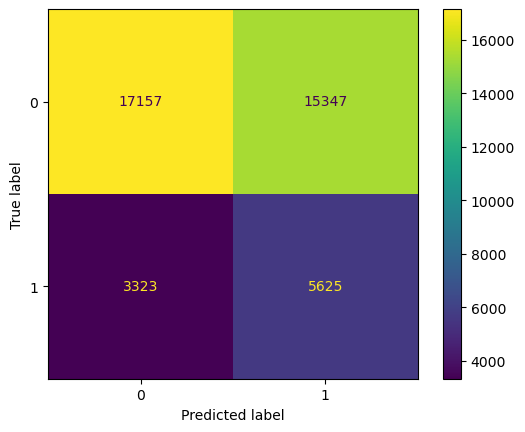

In [77]:


# Define X (predictors) and y (target variable)
X = df[['Product', 'Sub-product', 'Issue', 'State', 'Tags', 'Submitted via', 'Company response to consumer', 'Timely response?']]
y = df['Consumer disputed?']

# Convert categorical columns to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['Product', 'Sub-product', 'Issue', 'State', 'Tags', 'Submitted via', 'Company response to consumer', 'Timely response?'])

# Convert the target variable y to numerical (0s and 1s)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Check the proportion of complaints in the training dataset that are disputed
proportion_disputed = sum(y_train) / len(y_train)
if proportion_disputed < 0.3:
    # Use random undersampling
    undersampler = RandomUnderSampler(random_state=123)
    X_train, y_train = undersampler.fit_resample(X_train, y_train)

# Train XGBoost Classifier
model_xgb = XGBClassifier(random_state=123)
model_xgb.fit(X_train, y_train)

# Model Evaluation
y_pred = model_xgb.predict(X_test)

# Create a classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


cm = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [41]:
# Assuming 'model_xgb' is your trained XGBoost model
y_pred_proba = model_xgb.predict_proba(X_test)
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]  # Define thresholds

# Calculate costs for different thresholds
costs = []
for threshold in thresholds:
    y_pred_adjusted = (y_pred_proba[:, 1] > threshold).astype(int)
    conf_matrix = confusion_matrix(y_test, y_pred_adjusted)
    
    # Calculating costs
    total_cost = (conf_matrix[0, 1] * 600) + (conf_matrix[1, 0] * 100)
    costs.append(total_cost)

# Find the threshold with the lowest cost
lowest_cost = min(costs)
best_threshold = thresholds[costs.index(lowest_cost)]

print("Lowest Cost:", lowest_cost)
print("Best Threshold:", best_threshold)

Lowest Cost: 896500
Best Threshold: 0.9


In [42]:
# Assuming you've imported all necessary libraries and have 'y_test' as the test target variable
proportion_disputed_test = sum(y_test) / len(y_test)
print("Proportion of consumers who raised a dispute in the test set:", proportion_disputed_test)

Proportion of consumers who raised a dispute in the test set: 0.21586413200810575


In [45]:
#Split the data into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Check the proportion of complaints in the training dataset that are disputed
proportion_disputed = sum(y_train) / len(y_train)
if proportion_disputed < 0.3:
    # Use random undersampling
    undersampler = RandomUnderSampler(random_state=123)
    X_train, y_train = undersampler.fit_resample(X_train, y_train)

# Train XGBoost Classifier
model_xgb = XGBClassifier(random_state=123)
model_xgb.fit(X_train, y_train)

# Model Evaluation
y_pred = model_xgb.predict(X_test)

# Create a classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Calculate recall for the category 'Consumer disputed?' = 'Yes'
from sklearn.metrics import recall_score

recall_disputed = recall_score(y_test, y_pred, pos_label=1)
print("Recall for 'Consumer disputed?' = 'Yes':", recall_disputed)

              precision    recall  f1-score   support

           0       0.84      0.53      0.65     32504
           1       0.27      0.63      0.38      8948

    accuracy                           0.55     41452
   macro avg       0.55      0.58      0.51     41452
weighted avg       0.71      0.55      0.59     41452

[[17157 15347]
 [ 3323  5625]]
Recall for 'Consumer disputed?' = 'Yes': 0.62863209655789


In [46]:
# Define the costs as per the provided structure
cost_non_disputed = 100  # Cost to resolve a complaint not disputed
cost_disputed = 500      # Extra cost for resolving a disputed complaint
cost_extra_diligence = 90  # Cost for performing extra diligence

# Calculate the number of disputed and non-disputed complaints in the test set
num_non_disputed = (y_test == 0).sum()  # 0 represents 'Not disputed'
num_disputed = (y_test == 1).sum()      # 1 represents 'Disputed'

# Calculate the total cost without a model
total_cost_no_model = (num_non_disputed * cost_non_disputed) + (num_disputed * cost_disputed)
print("Total cost without a model:", total_cost_no_model)

Total cost without a model: 7724400


In [51]:
# Count the number of complaints predicted to be disputed (1)
num_disputed = sum(y_pred)

# Calculate the cost based on predictions
total_cost = (num_disputed * 90) + ((len(y_pred) - num_disputed) * 100)
total_cost = (num_disputed * 90) + ((len(y_pred) - num_disputed) * 100) 

print("Total cost based on model's predictions:", total_cost)

Total cost based on model's predictions: 3935480


In [54]:
# Assuming y_probs contains the predicted probabilities for the positive class (class 1)
y_probs = model_xgb.predict_proba(X_test)[:, 1]

thresholds = np.arange(0.1, 1.0, 0.01)  # Define a range of thresholds to test

lowest_cost = float('inf')
best_threshold = 0.5  # Default threshold

for threshold in thresholds:
    y_pred_adjusted = (y_probs > threshold).astype(int)
    num_disputed = sum(y_pred_adjusted)
    total_cost = (num_disputed * 90) + ((len(y_pred_adjusted) - num_disputed) * 100)

    if total_cost < lowest_cost:
        lowest_cost = total_cost
        best_threshold = threshold

print(f"Lowest total cost: {lowest_cost} at threshold: {best_threshold}")


Lowest total cost: 3731890 at threshold: 0.1


Lowest total cost: 3731890 at threshold: 0.1
